# Simple Audio emotion exploration and classification 

This is a notebook that explores the audio data in Audio Emotions dataset and shows a simple model to classify these images. 
I learned most of the code from a dude in youtube, his channel is - Valerio Velardo - The Sound of AI. Go check him out if you are interested in audio classification and sound AI stuff. 

This notebook is mainly just to give some basic information about the data set. I did not go in depth in comparing the emotions and datasets, but mostly just gave you some stuff to get started more easily if you are planning to make audio classifier yourself!

I am new to data science and classification, so this is just basic and im still learning and this notebook might not be up to some people's standards. 
If you have any ideas and advice on how to upgrade it, feel free to hit me up.

Few imports:

In [1]:
import librosa
from librosa import display
import os
import glob 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# Loading files
First we need to convert all the files from .wav to something we can use in our neural network.
We can make a list (lst) that contains the arrays of MFCC (40 dimensional vector that contains the information about audio files that we can use in training)

This does take a while, so if you are planning to run this, feel free to take a break and make yourself a coffe while this loads (Around 900seconds)

In [2]:
path = '/kaggle/input/audio-emotions/Emotions'
lst = []
i = -2
start_time = time.time()

for subdir, dirs, files in os.walk(path):
  i=i+1
  print(subdir)
  print(i)
  for file in files:

        #Load librosa array, obtain mfcss, add them to array and then to list.
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_fft=4096, hop_length=256, n_mfcc=40).T,axis=0) 
        arr = mfccs, i
        lst.append(arr) #Here we append the MFCCs to our list.

print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

/kaggle/input/audio-emotions/Emotions
-1
/kaggle/input/audio-emotions/Emotions/Neutral
0
/kaggle/input/audio-emotions/Emotions/Disgusted
1
/kaggle/input/audio-emotions/Emotions/Suprised
2
/kaggle/input/audio-emotions/Emotions/Happy
3
/kaggle/input/audio-emotions/Emotions/Sad
4
/kaggle/input/audio-emotions/Emotions/Fearful
5
/kaggle/input/audio-emotions/Emotions/Angry
6
--- Data loaded. Loading time: 997.1184778213501 seconds ---


Lets assign paths to some variables to paths of files from different datasets, so we can compare them and explore further.

Lets explore the Neutral path. 

In [3]:
#Add paths and get signals.

file1='/kaggle/input/audio-emotions/Emotions/Neutral/03-02-01-01-02-02-20.wav'
signal1, sample_rate = librosa.load(file1, sr=22050)

file2='/kaggle/input/audio-emotions/Emotions/Neutral/1007_WSI_NEU_XX.wav'
signal2, sample_rate = librosa.load(file2, sr=22050)

file3='/kaggle/input/audio-emotions/Emotions/Neutral/n01.wav'
signal3, sample_rate = librosa.load(file3, sr=22050)

file4='/kaggle/input/audio-emotions/Emotions/Neutral/YAF_vote_neutral.wav'
signal4, sample_rate = librosa.load(file4, sr=22050)

emotion='Neutral'


# Exploration

Let's draw the simplest of visualisations WaveForms!


Text(0.5, 1.0, 'TESS Waveform Neutral')

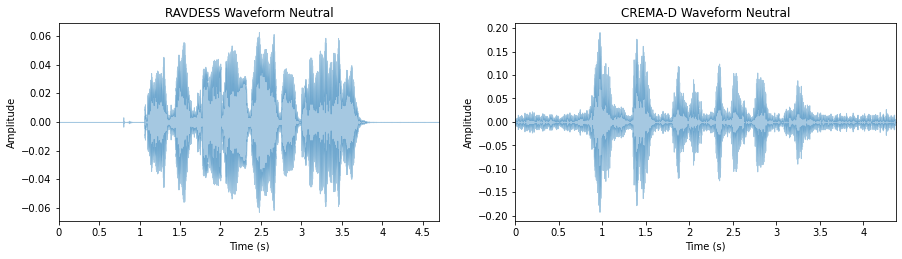

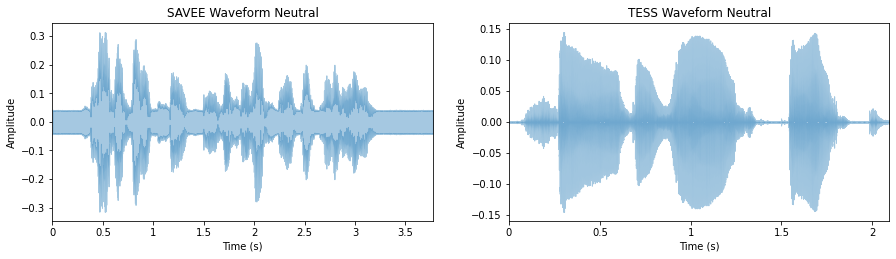

In [4]:
fig = plt.figure(figsize=(15,8))
# WAVEFORM
# display waveform
plt.subplot(2, 2, 1)
librosa.display.waveplot(signal1,sample_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("RAVDESS Waveform "+emotion)

plt.subplot(2, 2, 2)
librosa.display.waveplot(signal2,sample_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("CREMA-D Waveform "+emotion)


fig = plt.figure(figsize=(15,8))
plt.subplot(2, 2, 3)
librosa.display.waveplot(signal3,sample_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("SAVEE Waveform "+emotion)

plt.subplot(2, 2, 4)
librosa.display.waveplot(signal4,sample_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("TESS Waveform "+emotion)


Here we can see, that the aplitude difference is quite visible, witch is probably due to different recording environments, text and individual voice characterstics.

Now lets draw the power spectrums by performing Fourier transformations!

Text(0.5, 1.0, 'TESS Power spectrum Neutral')

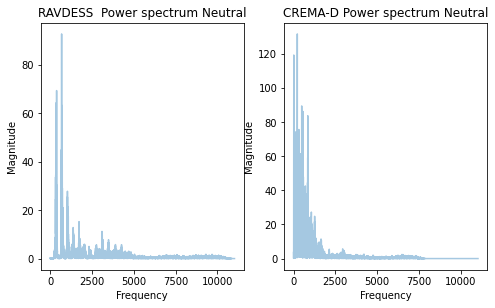

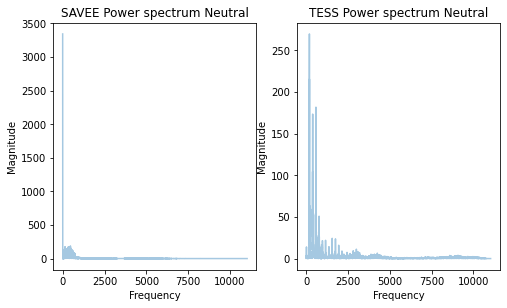

In [5]:
# FFT -> power spectrum
# perform Fourier transform
fft1 = np.fft.fft(signal1)
fft2 = np.fft.fft(signal2)
fft3 = np.fft.fft(signal3)
fft4 = np.fft.fft(signal4)

# calculate abs values on complex numbers to get magnitude
spectrum1 = np.abs(fft1)
spectrum2 = np.abs(fft2)
spectrum3 = np.abs(fft3)
spectrum4 = np.abs(fft4)

# create frequency variable
f1 = np.linspace(0, sample_rate, len(spectrum1))
f2 = np.linspace(0, sample_rate, len(spectrum2))
f3 = np.linspace(0, sample_rate, len(spectrum3))
f4 = np.linspace(0, sample_rate, len(spectrum4))

# take half of the spectrum and frequency
left_spectrum1 = spectrum1[:int(len(spectrum1)/2)]
left_f1 = f1[:int(len(spectrum1)/2)]
# take half of the spectrum and frequency
left_spectrum2 = spectrum2[:int(len(spectrum2)/2)]
left_f2 = f2[:int(len(spectrum2)/2)]
# take half of the spectrum and frequency
left_spectrum3 = spectrum3[:int(len(spectrum3)/2)]
left_f3 = f3[:int(len(spectrum3)/2)]
# take half of the spectrum and frequency
left_spectrum4 = spectrum4[:int(len(spectrum4)/2)]
left_f4 = f4[:int(len(spectrum4)/2)]

fig = plt.figure(figsize=(8,10))
plt.subplot(2, 2, 1)
# plot spectrum
plt.plot(left_f1, left_spectrum1, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("RAVDESS  Power spectrum "+emotion)

plt.subplot(2, 2,2)
# plot spectrum
plt.plot(left_f2, left_spectrum2, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("CREMA-D Power spectrum "+emotion)


fig = plt.figure(figsize=(8,10))

plt.subplot(2, 2, 3)
plt.plot(left_f3, left_spectrum3, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("SAVEE Power spectrum "+emotion)

plt.subplot(2, 2, 4)
plt.plot(left_f4, left_spectrum4, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("TESS Power spectrum "+emotion)


Here we can see that between the data sets the power spectrums are very different.

Lets draw the spectograms of theese files 

STFT hop length duration is: 0.011609977324263039s
STFT window duration is: 0.18575963718820862s


Text(0.5, 1.0, 'TESS Spectrogram Neutral')

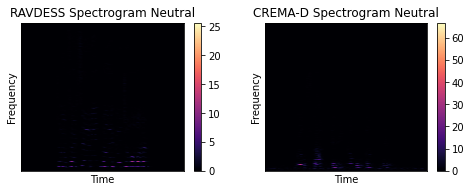

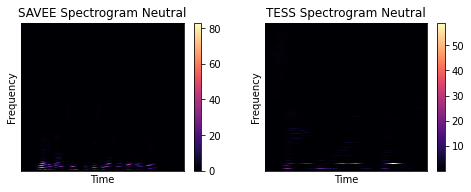

In [6]:
# STFT -> spectrogram
hop_length =256 # in num. of samples
n_fft = 4096 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# perform stft
stft1 = librosa.stft(signal1, n_fft=n_fft, hop_length=hop_length)
stft2 = librosa.stft(signal2, n_fft=n_fft, hop_length=hop_length)
stft3 = librosa.stft(signal3, n_fft=n_fft, hop_length=hop_length)
stft4 = librosa.stft(signal4, n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram1 = np.abs(stft1)
spectrogram2 = np.abs(stft2)
spectrogram3 = np.abs(stft3)
spectrogram4 = np.abs(stft4)


# display spectrogram


fig = plt.figure(figsize=(8,6))
plt.subplot(2, 2, 1)
librosa.display.specshow(spectrogram1, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("RAVDESS Spectrogram "+emotion)

plt.subplot(2, 2,2)
librosa.display.specshow(spectrogram2, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("CREMA-D Spectrogram "+emotion)


fig = plt.figure(figsize=(8,6))
plt.subplot(2, 2, 3)
librosa.display.specshow(spectrogram3, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("SAVEE Spectrogram "+emotion)

plt.subplot(2, 2, 4)
librosa.display.specshow(spectrogram4, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("TESS Spectrogram "+emotion)

This doesn't show much does it. Lets try to apply logarhithm to cast amplitude to decibels!

In [7]:
log_spectrogram1 = librosa.amplitude_to_db(spectrogram1)
log_spectrogram2 = librosa.amplitude_to_db(spectrogram2)
log_spectrogram3 = librosa.amplitude_to_db(spectrogram3)
log_spectrogram4 = librosa.amplitude_to_db(spectrogram4)

Lets display Spectogramms now!

Text(0.5, 1.0, 'TESS Spectogramm (dB) Neutral')

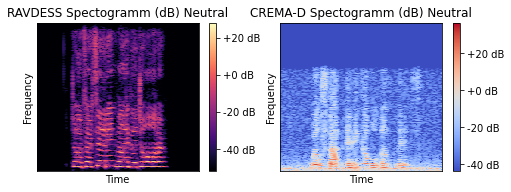

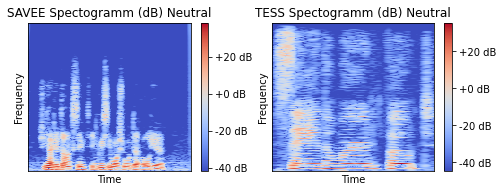

In [8]:
fig = plt.figure(figsize=(8,6))
plt.subplot(2, 2, 1)
librosa.display.specshow(log_spectrogram1, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("RAVDESS Spectogramm (dB) "+emotion)

plt.subplot(2, 2,2)
librosa.display.specshow(log_spectrogram2, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("CREMA-D Spectogramm (dB) "+emotion)


fig = plt.figure(figsize=(8,6))
plt.subplot(2, 2, 3)
librosa.display.specshow(log_spectrogram3, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("SAVEE Spectogramm (dB) "+emotion)

plt.subplot(2, 2, 4)
librosa.display.specshow(log_spectrogram4, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("TESS Spectogramm (dB) "+emotion)


Ah, much better. I've seen some classificators that use theese images as input to convolutional neural networks, so that might be a fun thing to try!

Now, lets actually see how the MFCC look! 

Text(0.5, 1.0, 'TESS MFCCs Neutral')

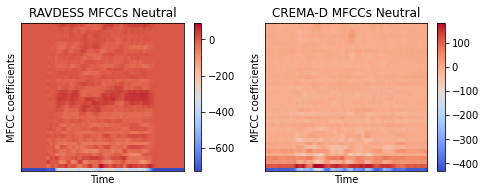

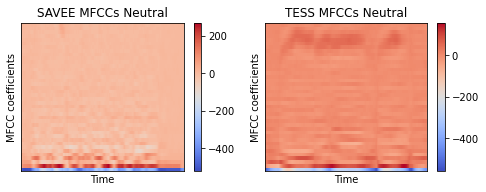

In [9]:
# MFCCs
# extract 13 MFCCs
MFCCs1 = librosa.feature.mfcc(signal1, sample_rate, n_fft=4096, hop_length=256, n_mfcc=40)
MFCCs2 = librosa.feature.mfcc(signal2, sample_rate, n_fft=4096, hop_length=256, n_mfcc=40)
MFCCs3 = librosa.feature.mfcc(signal3, sample_rate, n_fft=4096, hop_length=256, n_mfcc=40)
MFCCs4 = librosa.feature.mfcc(signal4, sample_rate, n_fft=4096, hop_length=256, n_mfcc=40)

# display MFCCs
hop_length=256


fig = plt.figure(figsize=(8,6))
plt.subplot(2, 2, 1)
librosa.display.specshow(MFCCs1, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("RAVDESS MFCCs "+emotion)

plt.subplot(2, 2,2)
librosa.display.specshow(MFCCs2, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("CREMA-D MFCCs "+emotion)


fig = plt.figure(figsize=(8,6))
plt.subplot(2, 2, 3)
librosa.display.specshow(MFCCs3, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("SAVEE MFCCs "+emotion)


plt.subplot(2, 2, 4)
librosa.display.specshow(MFCCs4, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("TESS MFCCs "+emotion)


So that is basically the information that we are going to be inputing in our neural network!
If you don't know what MFCCS are here's a wiki page - https://en.wikipedia.org/wiki/Mel-frequency_cepstrum#:~:text=Mel%2Dfrequency%20cepstral%20coefficients%20(MFCCs,%2Da%2Dspectrum%22).

# Let's build the classificator!

I din't add data augmentation, but that could be a fun thing to add in future versions, to see how results change!

Lets make the X and y and lets split them into test and train!

In [10]:
# Creating X and y: zip makes a list of all the first elements, and a list of all the second elements.
X, y = zip(*lst)
import numpy as np
X = np.asarray(X)
y = np.asarray(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#As always we need to expand the dimensions, so we can input the data to NN.
x_traincnn = np.expand_dims(X_train, axis=2) 
x_testcnn = np.expand_dims(X_test, axis=2)

Some imports! Not sure if we need all of them, but i did need them at some point so maybe they stayed. If they are not needed, let me know, and ill remove them!

In [11]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint


Using TensorFlow backend.


Let's build a simple Artificial neural network with some regularization and dropouts! Im still new to neural networks so this is definetly a sub-optimal solution! Feel free to change all of this.

In [12]:
#Simple model

model = keras.Sequential([

        # input layer
        keras.layers.Flatten(input_shape=(40, 1)),

        # 1st dense layer
        keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.1)),
        keras.layers.Dropout(0.5),

        # 2nd dense layer
        keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
        keras.layers.Dropout(0.5),

        # 3rd dense layer
        keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),

        # output layer
        keras.layers.Dense(10, activation='softmax')
    ])

    # compile model
optimiser = keras.optimizers.Adam(learning_rate=0.00001)
model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


Lets fit and visualize our training data!
This does take a while.

In [13]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=64, epochs=700, validation_data=(x_testcnn, y_test))

Train on 11518 samples, validate on 1280 samples
Epoch 1/700
11518/11518 [==============================] - 1s 105us/step - loss: 61.6419 - accuracy: 0.0913 - val_loss: 21.7746 - val_accuracy: 0.1695
Epoch 2/700
11518/11518 [==============================] - 1s 61us/step - loss: 48.9020 - accuracy: 0.1094 - val_loss: 15.1603 - val_accuracy: 0.1766
Epoch 3/700
11518/11518 [==============================] - 1s 59us/step - loss: 43.7282 - accuracy: 0.1252 - val_loss: 13.7116 - val_accuracy: 0.1633
Epoch 4/700
11518/11518 [==============================] - 1s 61us/step - loss: 39.0819 - accuracy: 0.1354 - val_loss: 13.4457 - val_accuracy: 0.1961
Epoch 5/700
11518/11518 [==============================] - 1s 63us/step - loss: 36.1809 - accuracy: 0.1378 - val_loss: 12.7772 - val_accuracy: 0.2078
Epoch 6/700
11518/11518 [==============================] - 1s 69us/step - loss: 33.6684 - accuracy: 0.1406 - val_loss: 12.1319 - val_accuracy: 0.1984
Epoch 7/700
11518/11518 [=========================

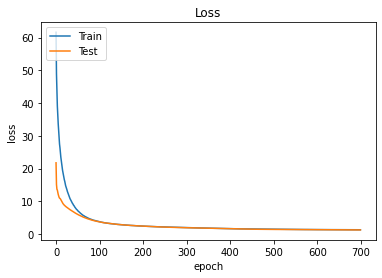

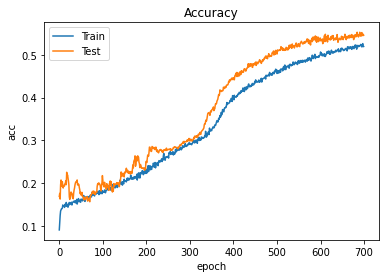

In [14]:

plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Results!

Lets see how we did.

Lets get a classification report and lets see in more detail which emotions are easier and which are harder to classify.

In [15]:
from sklearn.metrics import classification_report

predictions = model.predict_classes(x_testcnn)
y_test = y_test.astype(int)
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.65      0.45      0.54       185
           1       0.54      0.44      0.49       194
           2       0.61      0.79      0.69        57
           3       0.51      0.43      0.47       231
           4       0.47      0.78      0.59       217
           5       0.60      0.35      0.44       197
           6       0.59      0.73      0.65       199

    accuracy                           0.55      1280
   macro avg       0.57      0.57      0.55      1280
weighted avg       0.56      0.55      0.53      1280



Let's make a classification matrix to see more in depth about classifications.

In [16]:

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, predictions)
print (matrix)

[[ 84  20   1  15  53   9   3]
 [ 11  86   7  21  41   8  20]
 [  0   2  45   1   6   1   2]
 [ 12  22   7 100  23  13  54]
 [ 10  12   7   9 169   9   1]
 [ 10   8   3  22  63  69  22]
 [  2   9   4  28   5   6 145]]


That looks, too boring. Lets get seaborn heatmap to help us with that!

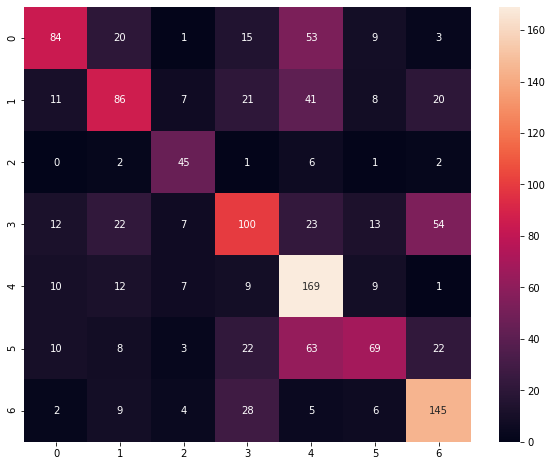

In [17]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(matrix, annot=True, fmt="d");

Here we can make a lot of different conclusions, like 2nd class is often classified as 0 and so on.

If you want you can also save the model!

In [18]:
model_name = 'EmotionClassificationModel.h5'
save_dir = '/kaggle/working'
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /kaggle/working/EmotionClassificationModel.h5 
